# Convert RNA into Character Table Matrix - 4 category
## Import necessary package and mount google drive

In [1]:
import numpy as np
import glob
import os
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
s = glob.glob('/content/drive/My Drive/Colab Notebooks/*')
#Test if mounted successful

## Prepare the sequence file and setup the converting function

In [0]:
def generate_RNATable(sequence):
    symbols = ['A','C','G','U']
    Special_symbols = ['R','Y','K','M','S','W','B','D','H','V','N']
    Special_Loc = ['G','C','G','A','G','A','G','G','A','G','A']
    total = []
    for i in sequence:
        seq_mat = [0,0,0,0]
        if i in symbols:
            seq_mat[symbols.index(i)] = 1
        elif i in Special_symbols:
            convert_chr = Special_Loc[Special_symbols.index(i)]
            seq_mat[symbols.index(convert_chr)] = 1
        else:
            seq_mat[0] = 1
        total.append(seq_mat)
    return(total)

In [4]:
with open('/content/drive/My Drive/Colab Notebooks/hairpin.fa', 'r') as f:
    measure = []
    symbols = ['A','C','G','U']
    while(True):
        inputs = f.readline()
        inputs = inputs.strip()
        if not inputs:
            break
        if inputs[0] is not ">":
          if len(inputs) < 70:
            measure.append(len(inputs))
len(measure)

81527

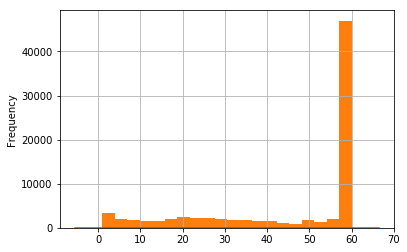

In [5]:
import pandas as pd
p = np.array(measure)
p.max()
sns.distplot(p)
#sns.distplot(p, kde=False, rug=True)
pand = pd.Series(p)
pand.plot.hist(grid=True, bins=20)

In [0]:
test = []
with open('/content/drive/My Drive/Colab Notebooks/hairpin.fa', 'r') as f:
    while(True):
        inputs = f.readline()
        inputs = inputs.strip() #remove \n
        if not inputs:
            break
        if inputs[0] != '>' and len(inputs) == 60:
            length = len(inputs)
            rounds = p.max() - length
            table = generate_RNATable(inputs)
            #add extra matrix
            for j in np.arange(rounds):
                table.append([0,0,0,0])
            test.append(table)
print("The symbols matrix are:", symbols)

The symbols matrix are: ['A', 'C', 'G', 'U']


In [0]:
test[0]

[[0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0]]

In [0]:
matrix_hairpin = np.array(test)
#save numpy obj
np.save('/content/drive/My Drive/Colab Notebooks/table_hairpin60_s', matrix_hairpin)